In [343]:
import pandas as pd
df = pd.read_csv('aus.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


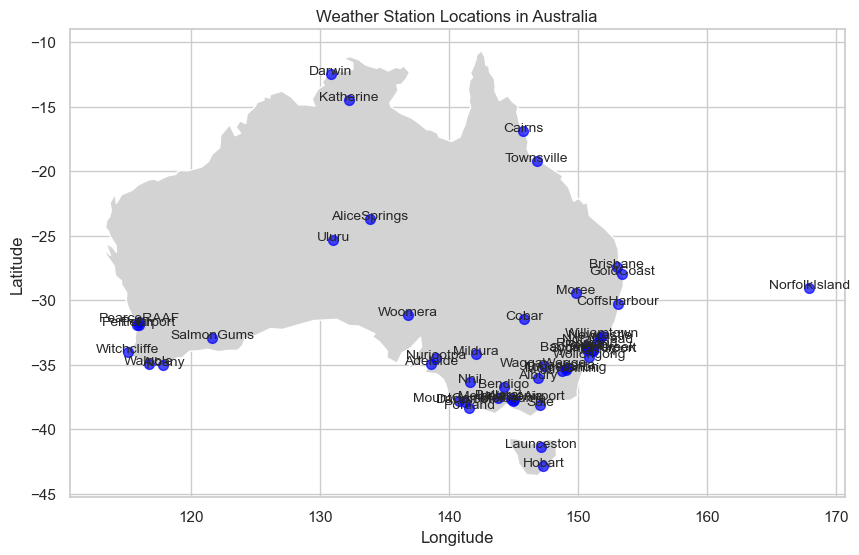

In [344]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile provided by geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only Australia
australia = world[world.name == 'Australia']

# Define the location coordinates
location_coordinates = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8799, 150.7525),
    'Cobar': (-31.4980, 145.8340),
    'CoffsHarbour': (-30.2960, 153.1150),
    'Moree': (-29.4644, 149.8415),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1150, 147.3677),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2820, 149.1287),
    'Tuggeranong': (-35.4232, 149.0860),
    'MountGinini': (-35.5294, 148.7727),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7589, 144.2836),
    'Sale': (-38.1119, 147.0634),
    'MelbourneAirport': (-37.6705, 144.8322),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2083, 142.1244),
    'Nhil': (-36.3328, 141.6502),
    'Portland': (-38.3510, 141.6056),
    'Watsonia': (-37.7117, 145.0835),
    'Dartmoor': (-37.9225, 141.2765),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2580, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8284, 140.7815),
    'Nuriootpa': (-34.4694, 139.0057),
    'Woomera': (-31.1995, 136.8254),
    'Albany': (-35.0031, 117.8656),
    'Witchcliffe': (-34.0170, 115.1001),
    'PearceRAAF': (-31.6675, 116.0159),
    'PerthAirport': (-31.9405, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9817, 121.6437),
    'Walpole': (-34.9773, 116.7311),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1401),
    'AliceSprings': (-23.7002, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4640, 132.2635),
    'Uluru': (-25.3444, 131.0369)
}

# Create a GeoDataFrame for the locations
geometry = gpd.points_from_xy([coord[1] for coord in location_coordinates.values()], [coord[0] for coord in location_coordinates.values()])
gdf = gpd.GeoDataFrame(location_coordinates.keys(), geometry=geometry, columns=['Location'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, color='blue', alpha=0.7)

# Add labels for each location
for idx, row in gdf.iterrows():
    ax.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=10, ha='center')

# Set title and axis labels
ax.set_title('Weather Station Locations in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

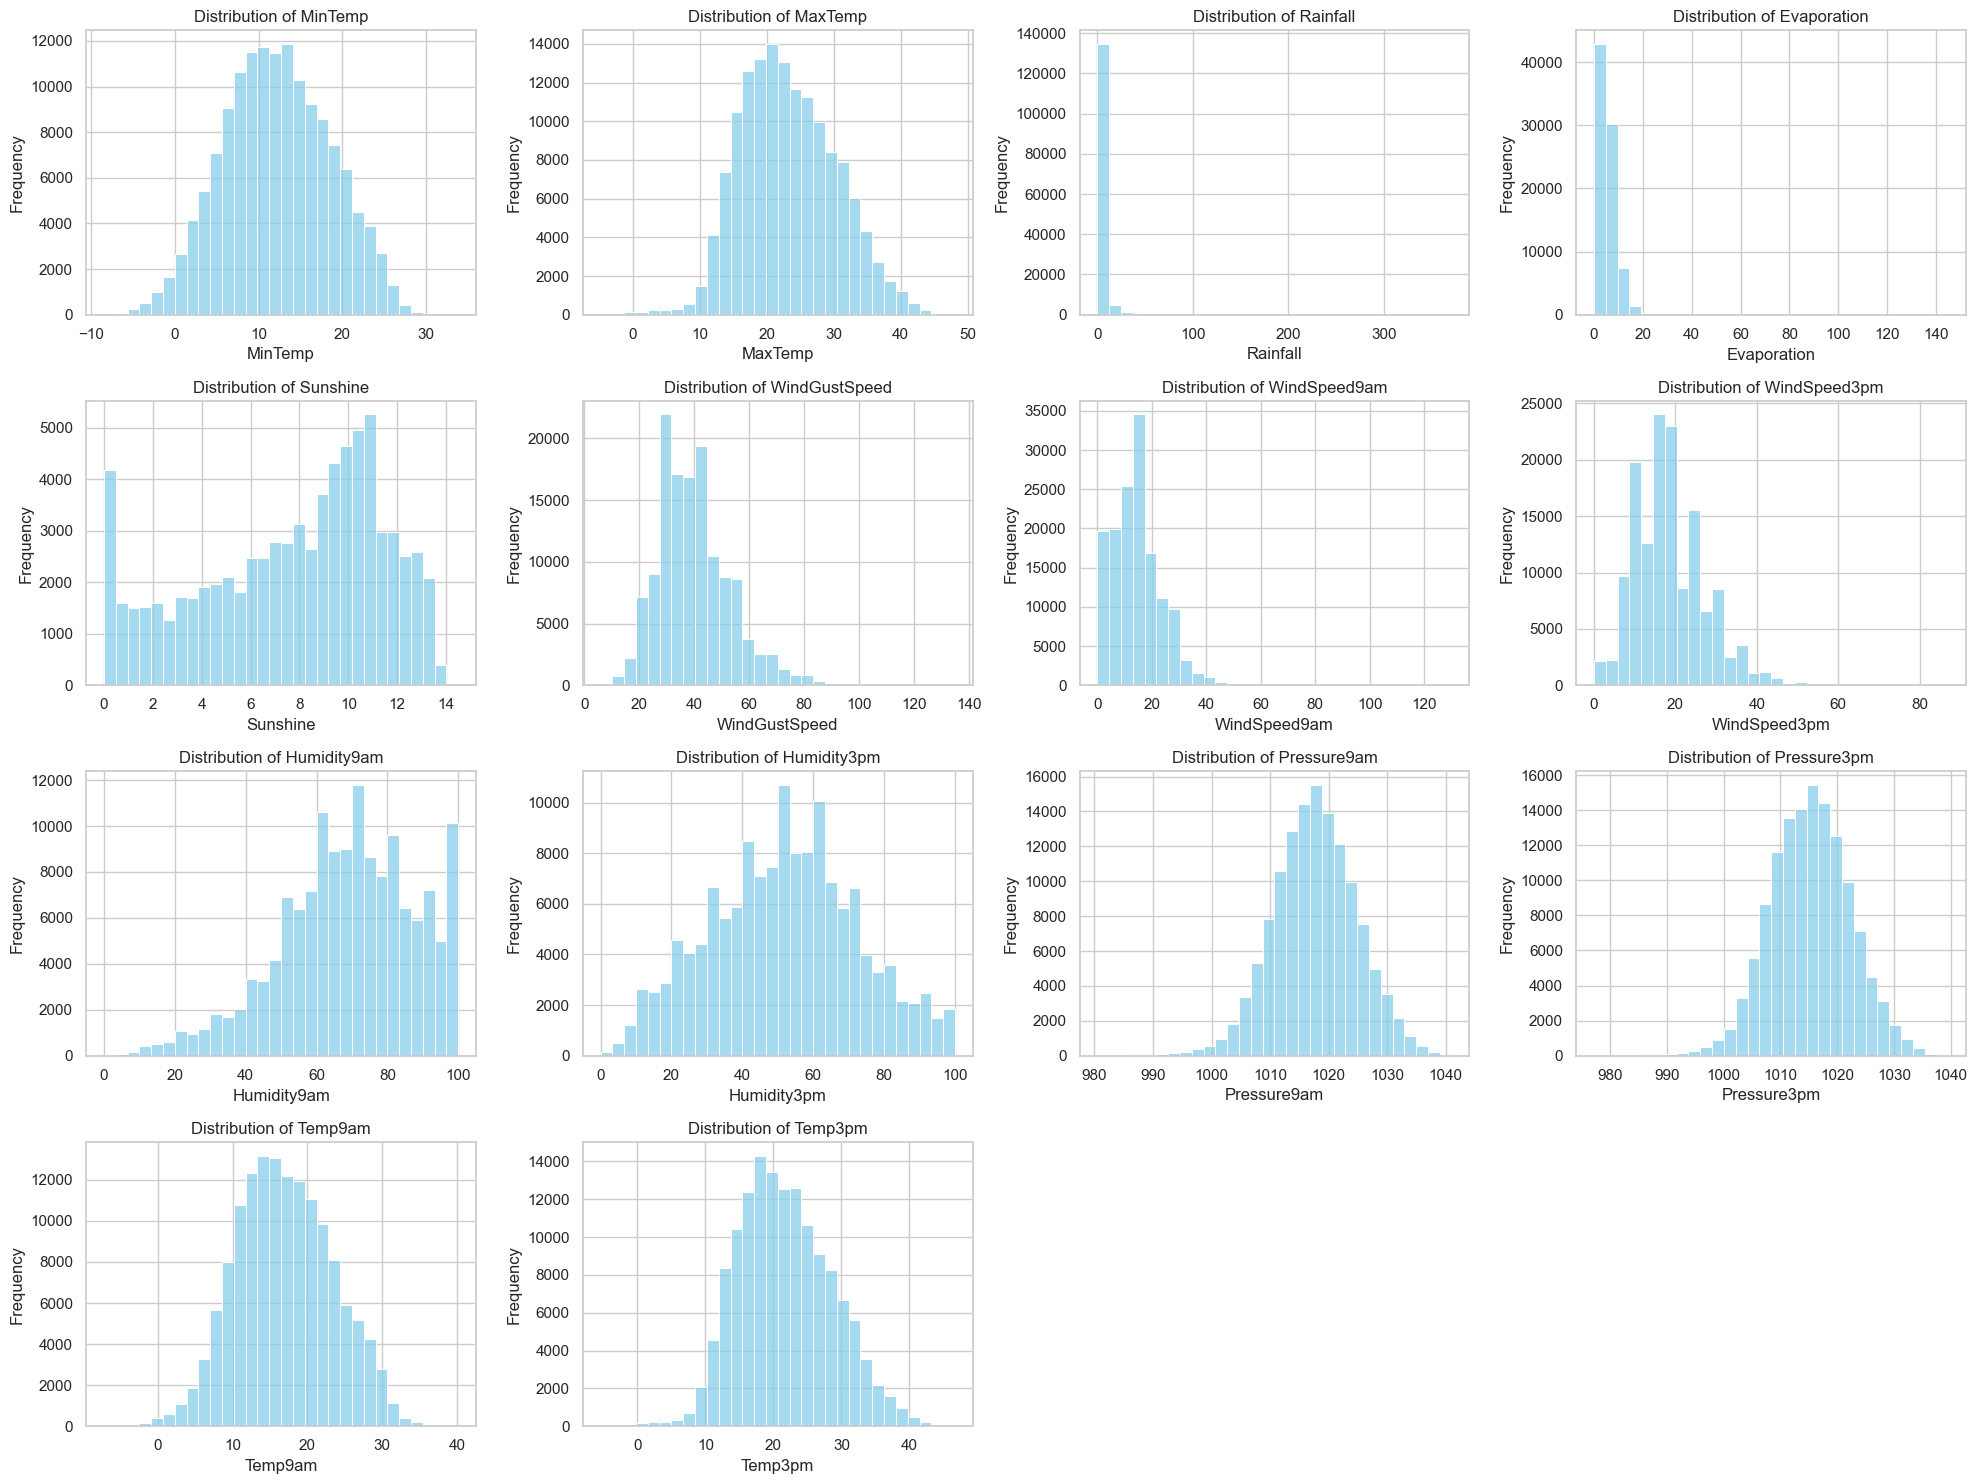

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical columns to visualize
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                     'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 
                     'Temp9am', 'Temp3pm']

# Create subplots for each column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

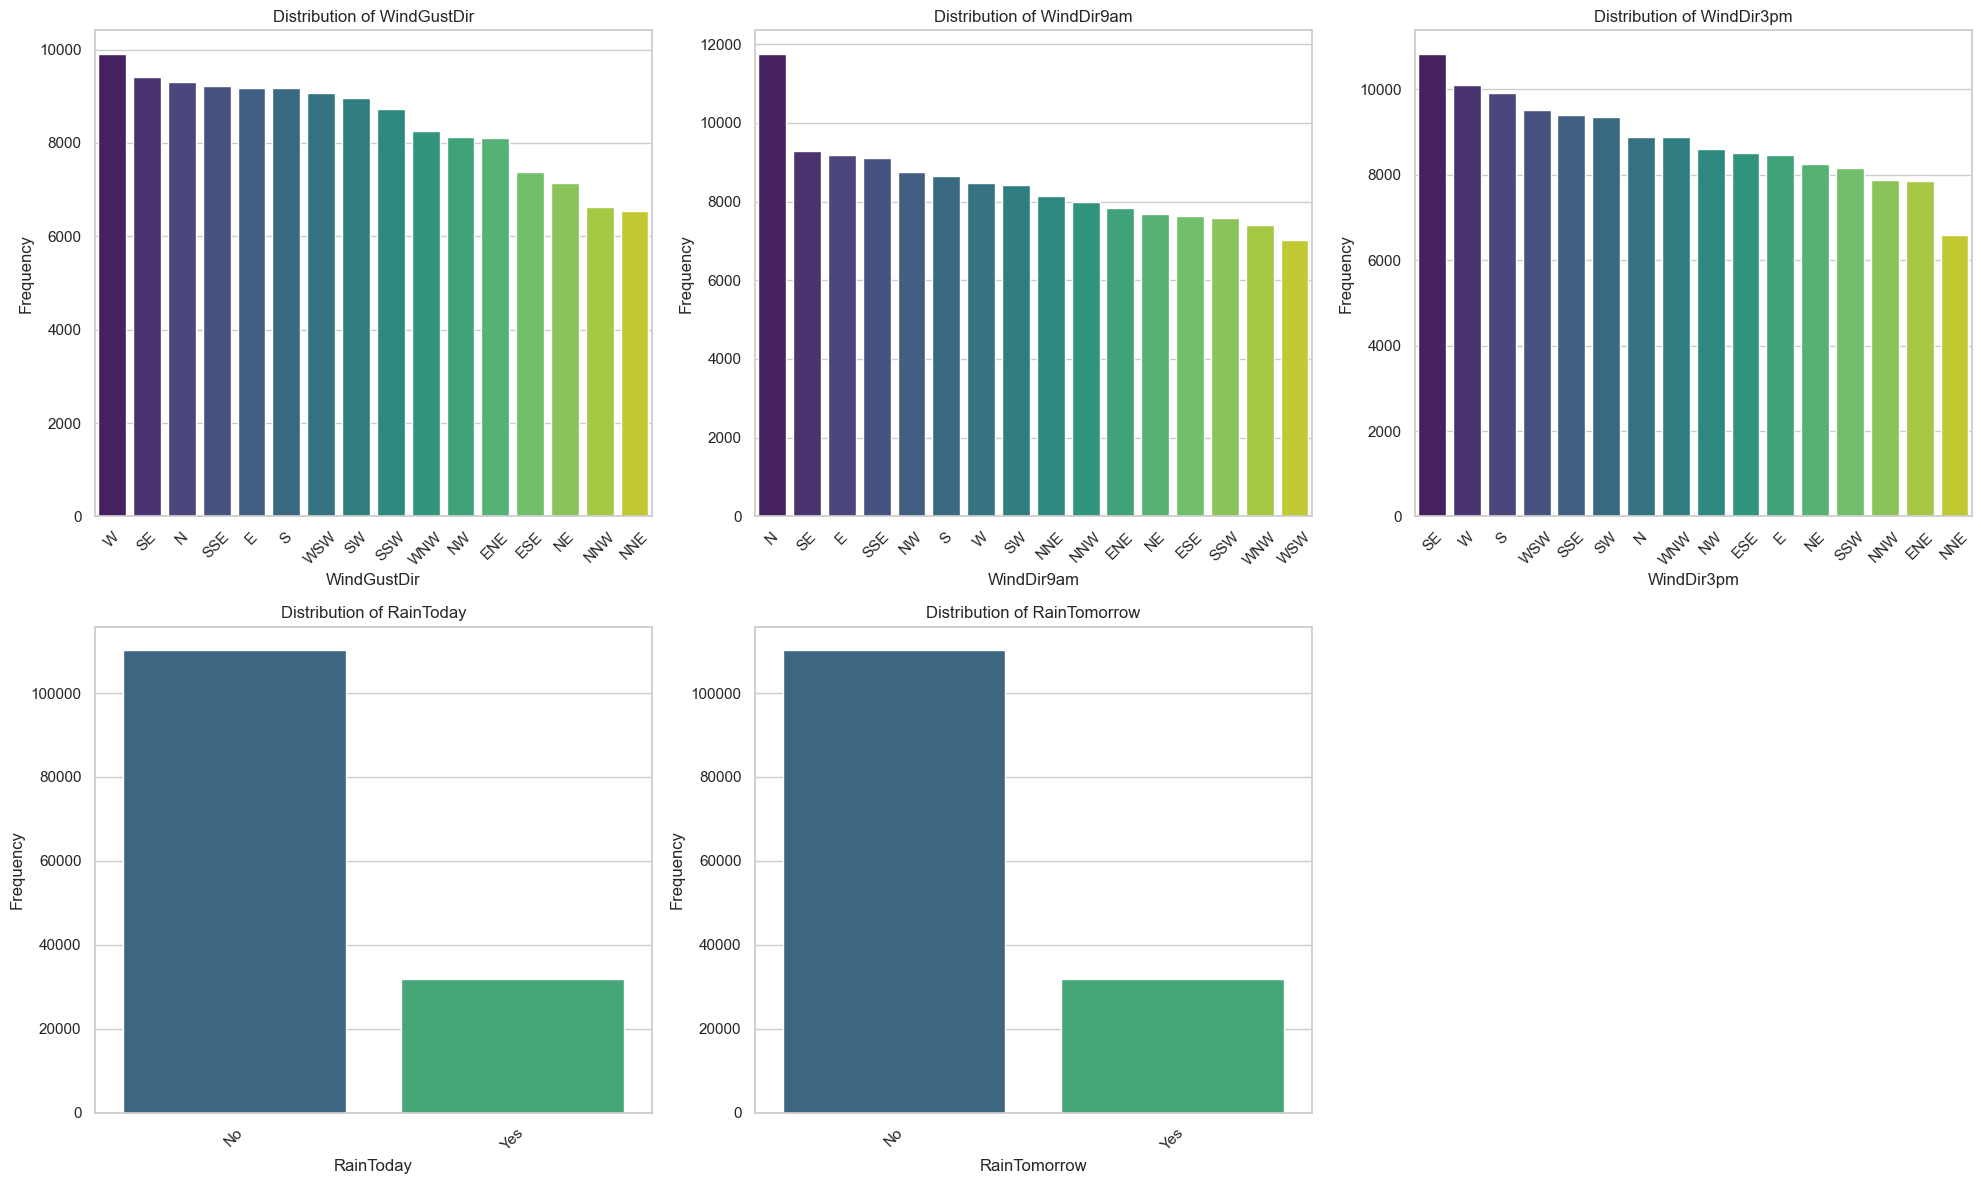

In [346]:
# Initialize the figure
plt.figure(figsize=(20, 12))

# Create a list of categorical columns to visualize
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Create subplots for each column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

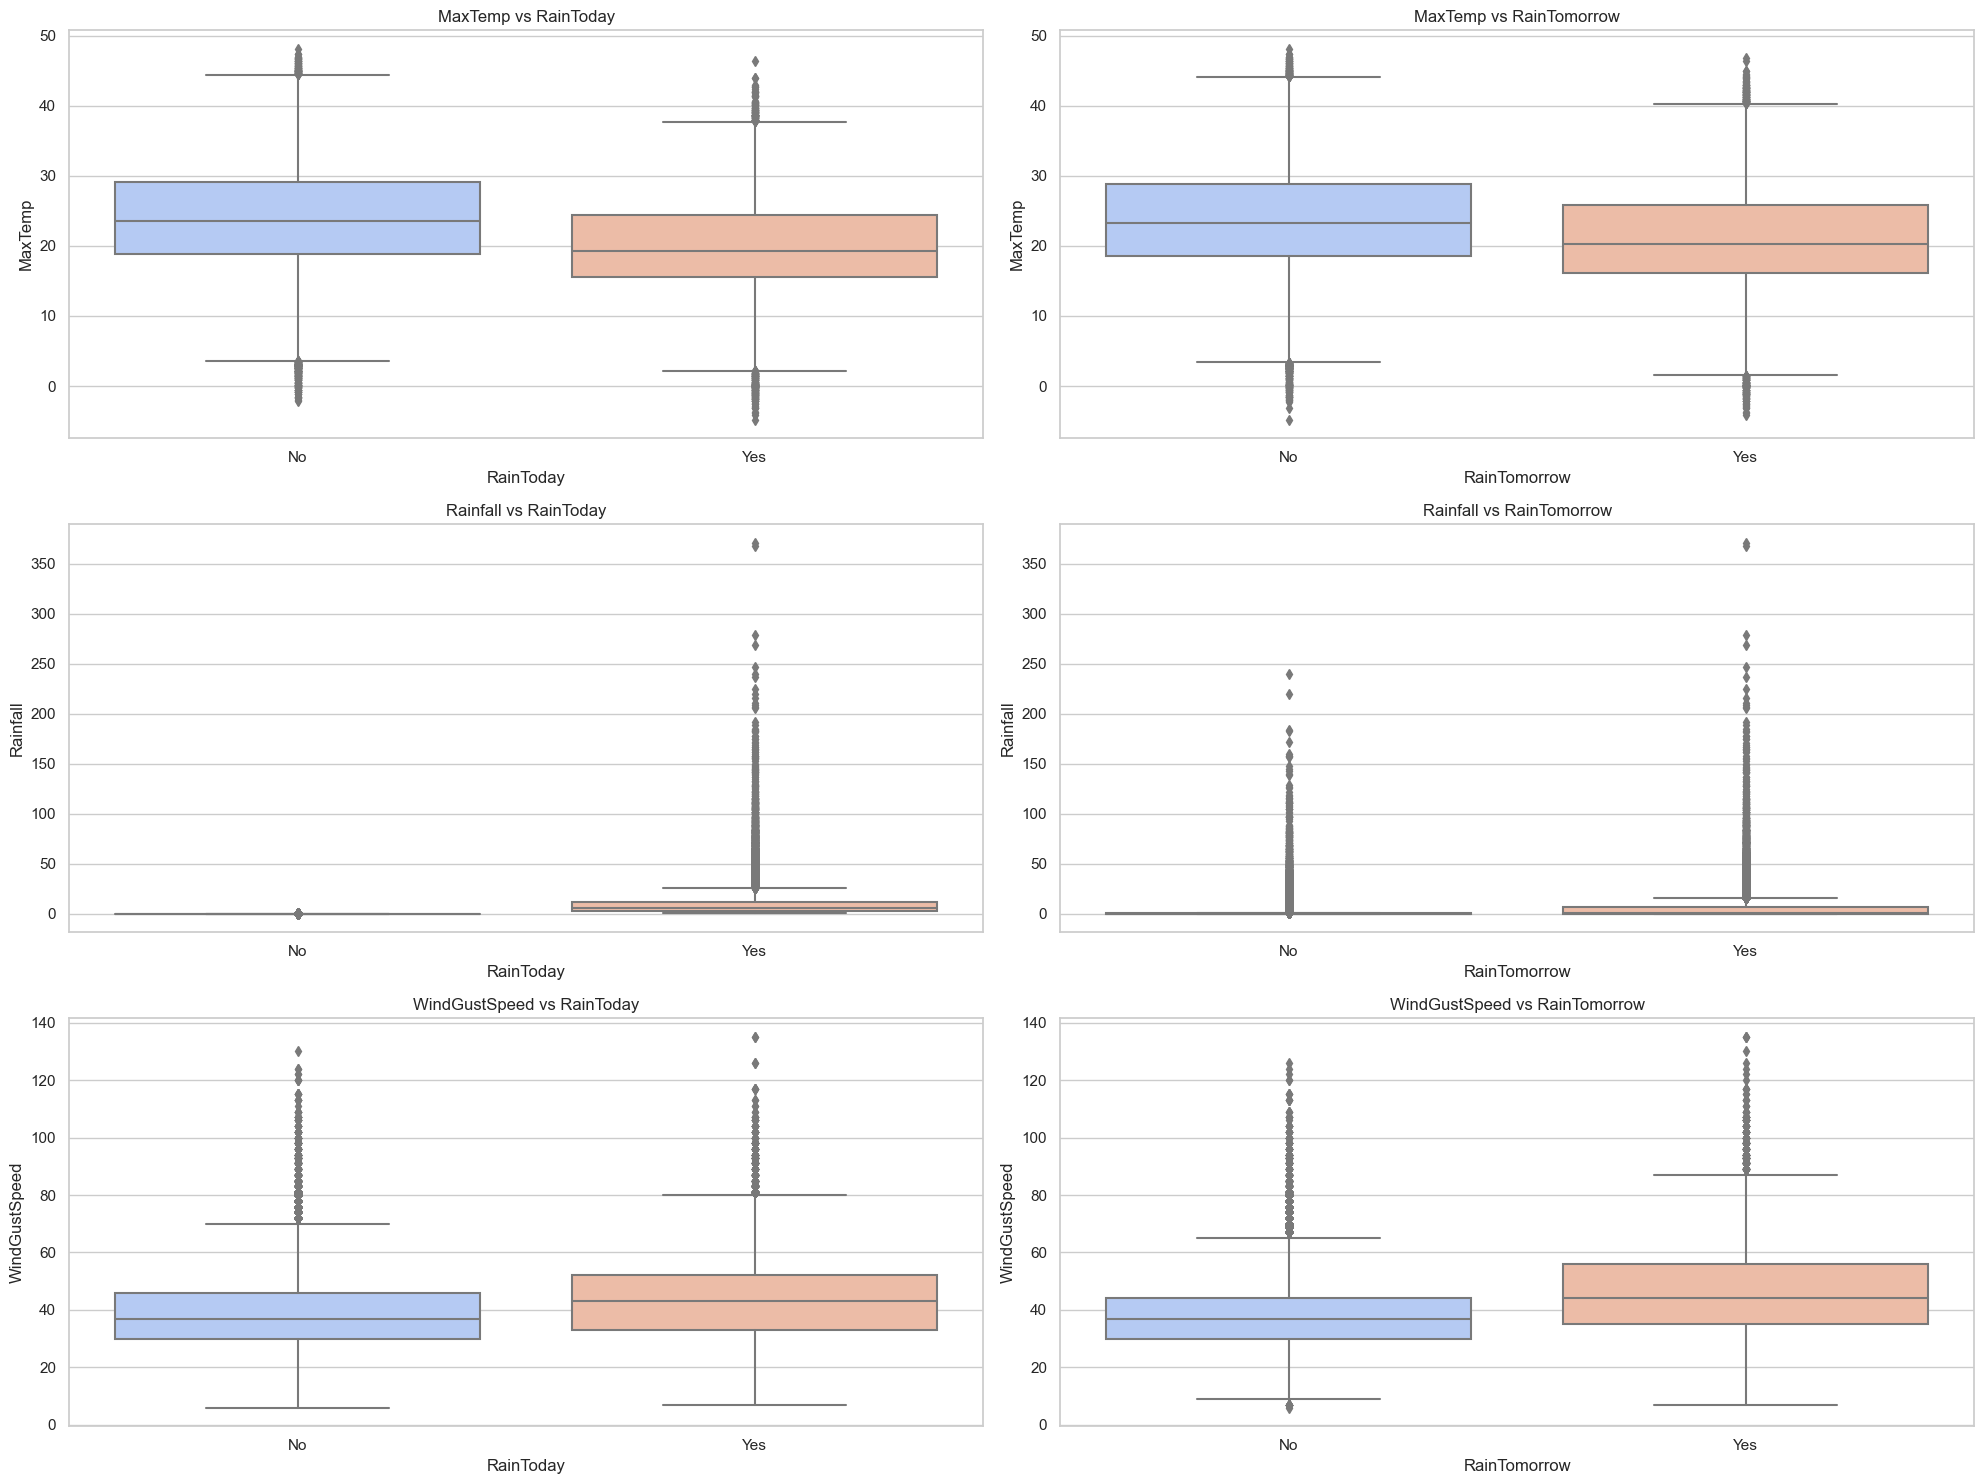

In [347]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to visualize
numerical_features_to_compare = ['MaxTemp', 'Rainfall', 'WindGustSpeed']

# Create subplots for each combination of numerical feature and categorical feature ('RainToday' and 'RainTomorrow')
for i, num_feature in enumerate(numerical_features_to_compare, 1):
    for j, cat_feature in enumerate(['RainToday', 'RainTomorrow'], 1):
        plt.subplot(3, 2, 2*(i-1) + j)
        sns.boxplot(data=df, x=cat_feature, y=num_feature, palette='coolwarm')
        plt.title(f'{num_feature} vs {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)

# Adjust layout
plt.tight_layout()
plt.show()


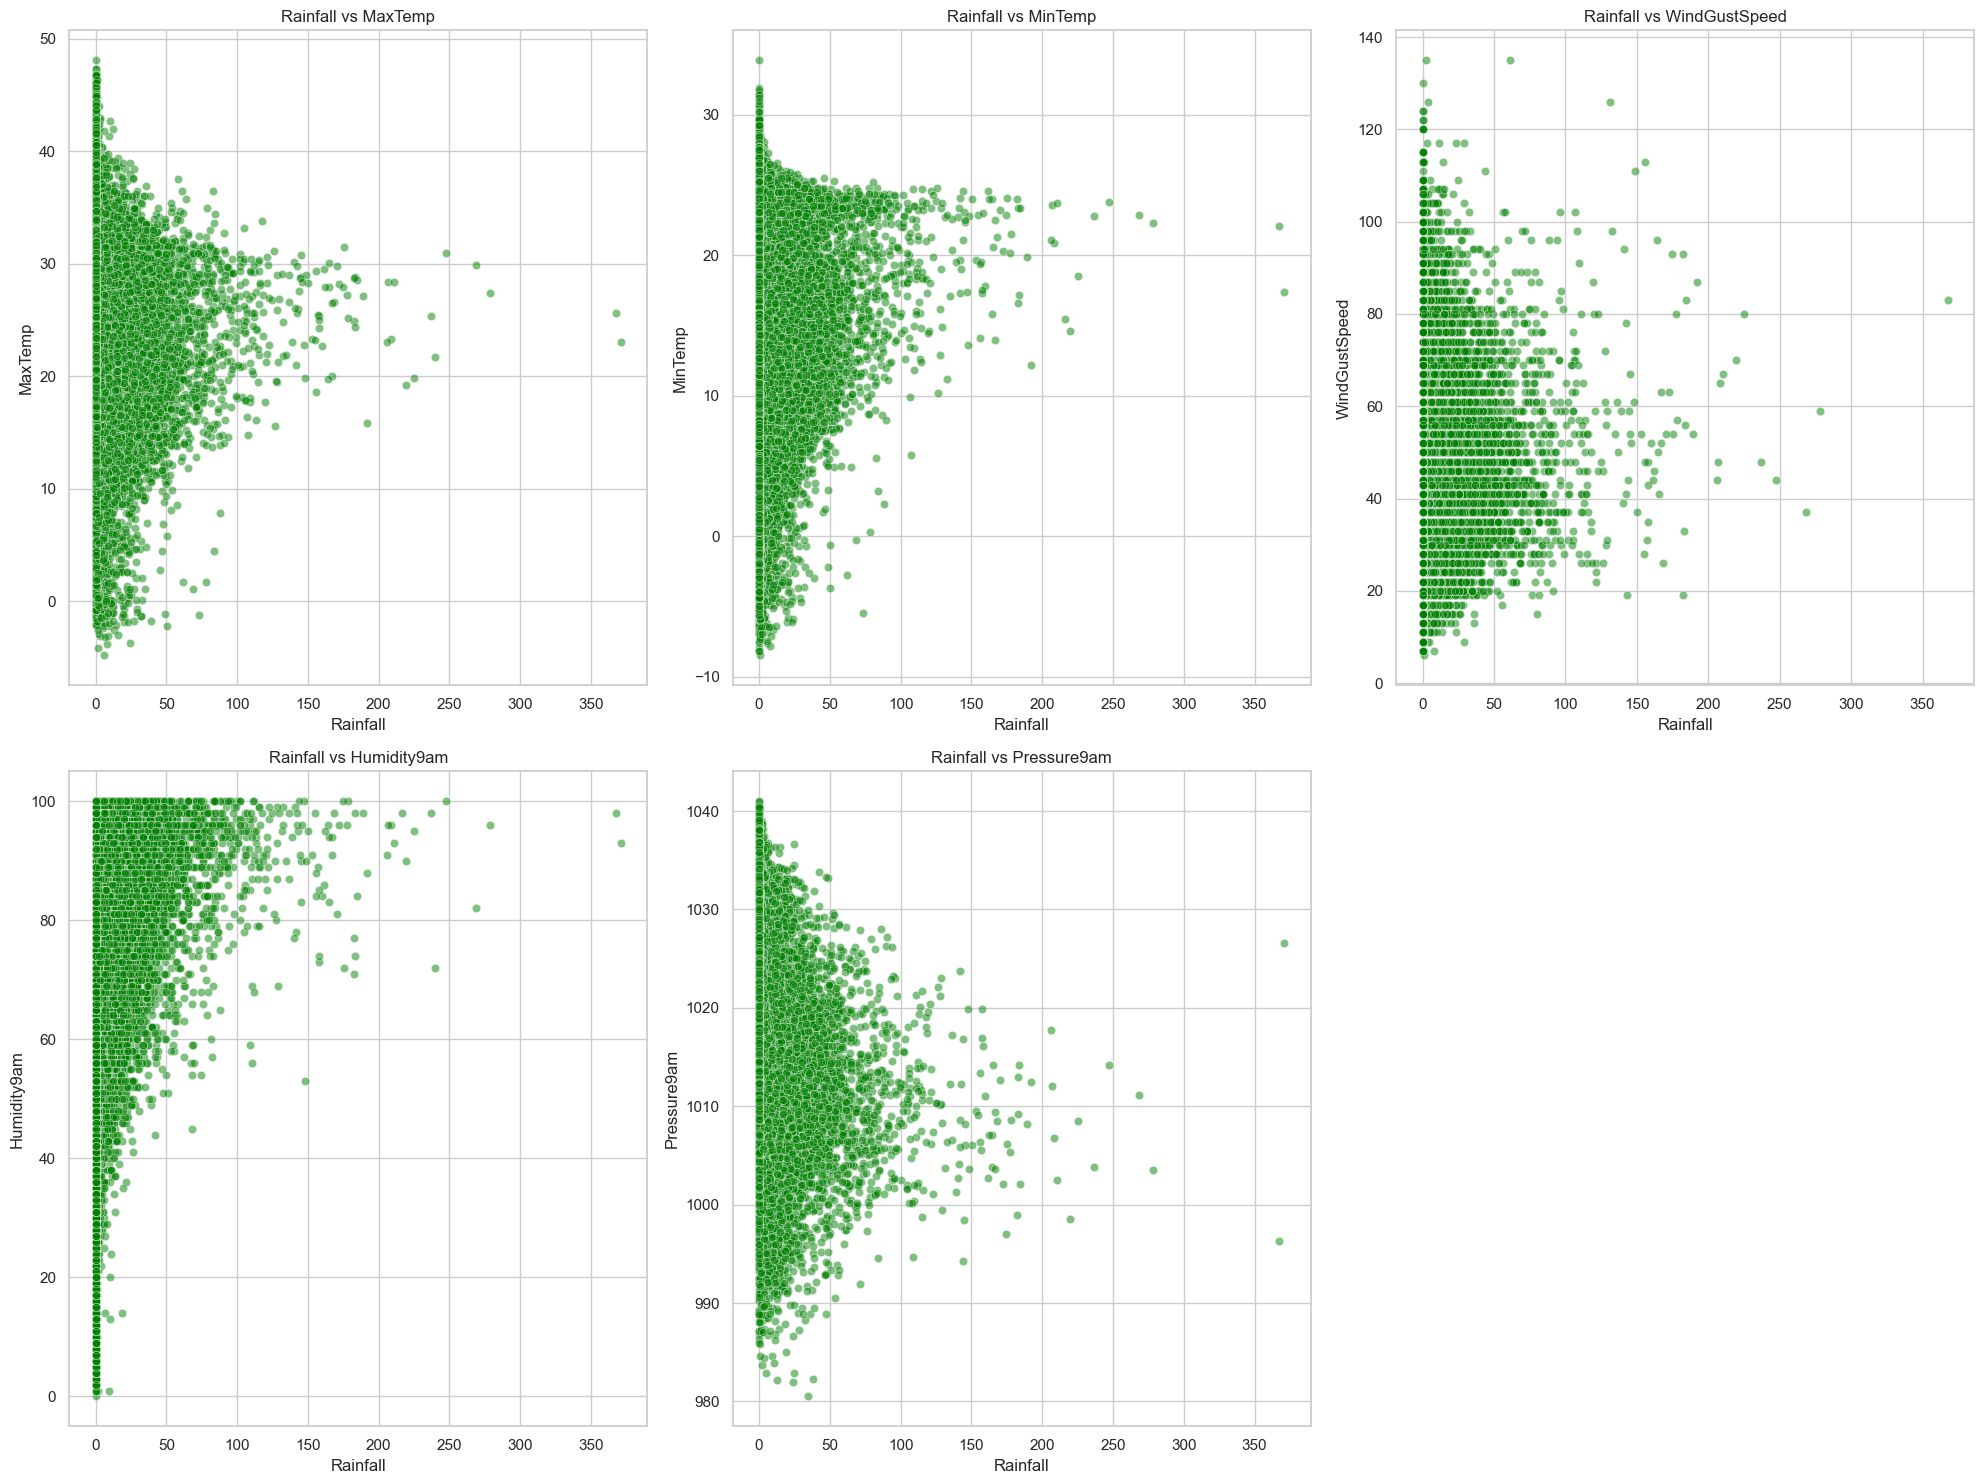

In [348]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to compare with 'Rainfall'
features_to_compare_with_rainfall = ['MaxTemp', 'MinTemp', 'WindGustSpeed', 'Humidity9am', 'Pressure9am']

# Create subplots for each feature to compare with 'Rainfall'
for i, feature in enumerate(features_to_compare_with_rainfall, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Rainfall', y=feature, alpha=0.5, color='green')
    plt.title(f'Rainfall vs {feature}')
    plt.xlabel('Rainfall')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [349]:
# Drop columns with a large number of missing values
# columns_to_drop = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
df_dropped_columns = df.drop(columns=columns_to_drop)

# Show the first few rows of the modified dataset
df_dropped_columns.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [350]:
# # Impute 'RainToday' based on 'Rainfall' values
# df_dropped_columns['RainToday'].fillna(df_dropped_columns['Rainfall'].apply(lambda x: 'Yes' if x > 0 else 'No'), inplace=True)

# # Check if there are still any missing values in 'RainToday'
# df_dropped_columns['RainToday'].isnull().sum()

In [351]:
# # Convert the 'Date' column to datetime format
# df_dropped_columns['Date'] = pd.to_datetime(df_dropped_columns['Date'])

# # Sort the data by 'Location' and 'Date'
# df_dropped_columns.sort_values(by=['Location', 'Date'], inplace=True)

# # Show the first few rows of the dataset after sorting
# df_dropped_columns.head()

In [352]:
# # Combine the steps for handling missing values using time-weighted interpolation, with fix for the 'Location' issue

# # Start with the original DataFrame (df) for demonstration
# df_copy = df.copy()

# # 1. Impute 'RainToday' based on 'Rainfall' values
# df_copy['RainToday'].fillna(df_copy['Rainfall'].apply(lambda x: 'Yes' if x > 0 else 'No'), inplace=True)

# # 2. Drop columns with a large number of missing values
# columns_to_drop = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
# df_dropped_columns = df_copy.drop(columns=columns_to_drop)

# # 3. Convert 'Date' column to datetime data type
# df_dropped_columns['Date'] = pd.to_datetime(df_dropped_columns['Date'])

# # 4. Sort the DataFrame by 'Location' and 'Date'
# df_dropped_columns.sort_values(by=['Location', 'Date'], inplace=True)

# # 5. Set 'Date' as the DatetimeIndex
# df_dropped_columns.set_index('Date', inplace=True)

# # 6. Perform time-weighted interpolation for each location group
# df_interpolated = df_dropped_columns.groupby('Location').apply(lambda group: group.interpolate(method='time'))

# # 7. Drop the 'Location' level from the index to avoid the "already exists" issue
# df_interpolated.index = df_interpolated.index.droplevel(0)

# # 8. Reset the index to make 'Date' a column again
# df_interpolated.reset_index(inplace=True)

# # 9. Check if there are still any missing values
# remaining_missing_after_interpolation = df_interpolated.isnull().sum()
# remaining_missing_after_interpolation = remaining_missing_after_interpolation[remaining_missing_after_interpolation > 0]
# remaining_missing_after_interpolation.sort_values(ascending=False)

# # Show remaining missing values
# remaining_missing_after_interpolation


In [353]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Create a deep copy of the DataFrame to hold the imputed values
# df_imputed = df_interpolated.copy(deep=True)

# # Identify categorical columns for mode imputation
# categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# # Perform mode imputation for categorical columns
# for col in categorical_columns:
#     mode_value = df_imputed[col].mode()[0]
#     df_imputed[col].fillna(mode_value, inplace=True)

# # Perform MICE imputation for numerical columns
# # Create an imputer object
# mice_imputer = IterativeImputer()

# # Identify numerical columns for MICE imputation
# numerical_columns = df_imputed.select_dtypes(include=['float64']).columns.tolist()

# # Perform the imputation
# df_imputed[numerical_columns] = mice_imputer.fit_transform(df_imputed[numerical_columns])

# # Check if there are still any missing values
# remaining_missing_after_all_imputations = df_imputed.isnull().sum()
# remaining_missing_after_all_imputations = remaining_missing_after_all_imputations[remaining_missing_after_all_imputations > 0]
# remaining_missing_after_all_imputations.sort_values(ascending=False)


In [354]:
# # Remove rows where the target variable 'RainTomorrow' is missing
# df_imputed.dropna(subset=['RainTomorrow'], inplace=True)

# # Check again for any remaining missing values
# remaining_missing_final = df_imputed.isnull().sum()
# remaining_missing_final = remaining_missing_final[remaining_missing_final > 0]
# remaining_missing_final.sort_values(ascending=False)

In [355]:
full_data = df_dropped_columns.copy()
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [356]:
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data.drop(['Date'], axis = 1,inplace=True) 
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [357]:
full_data.shape

(145460, 21)

In [358]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      142199 non-null  object 
 17  RainTomorrow   142193 non-nul

In [359]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5


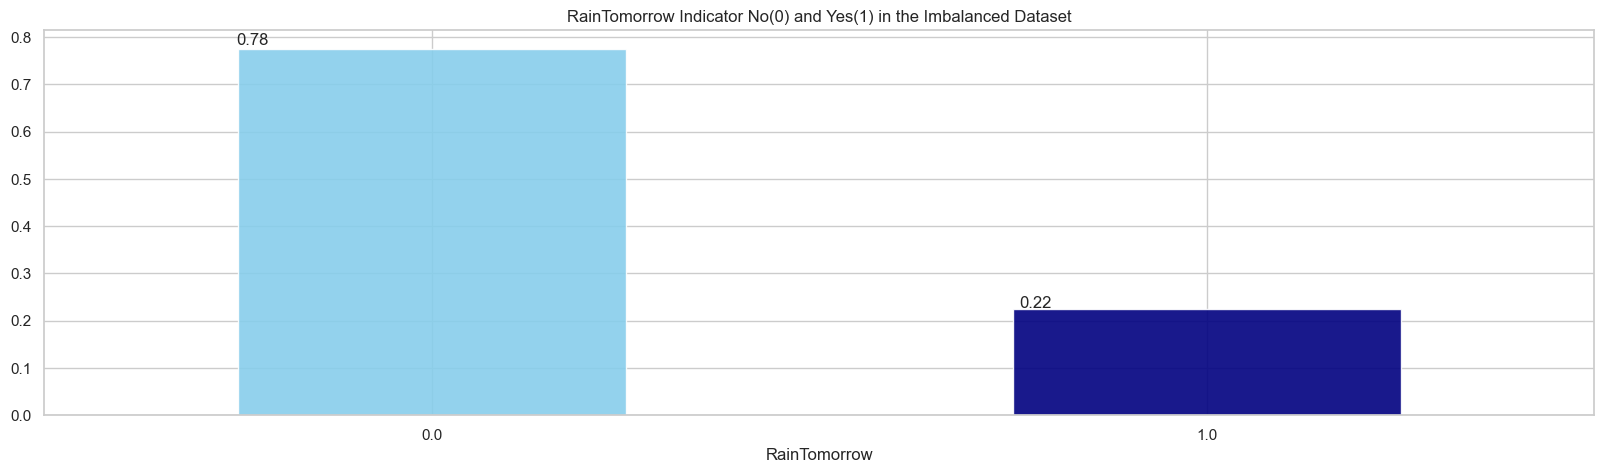

In [360]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

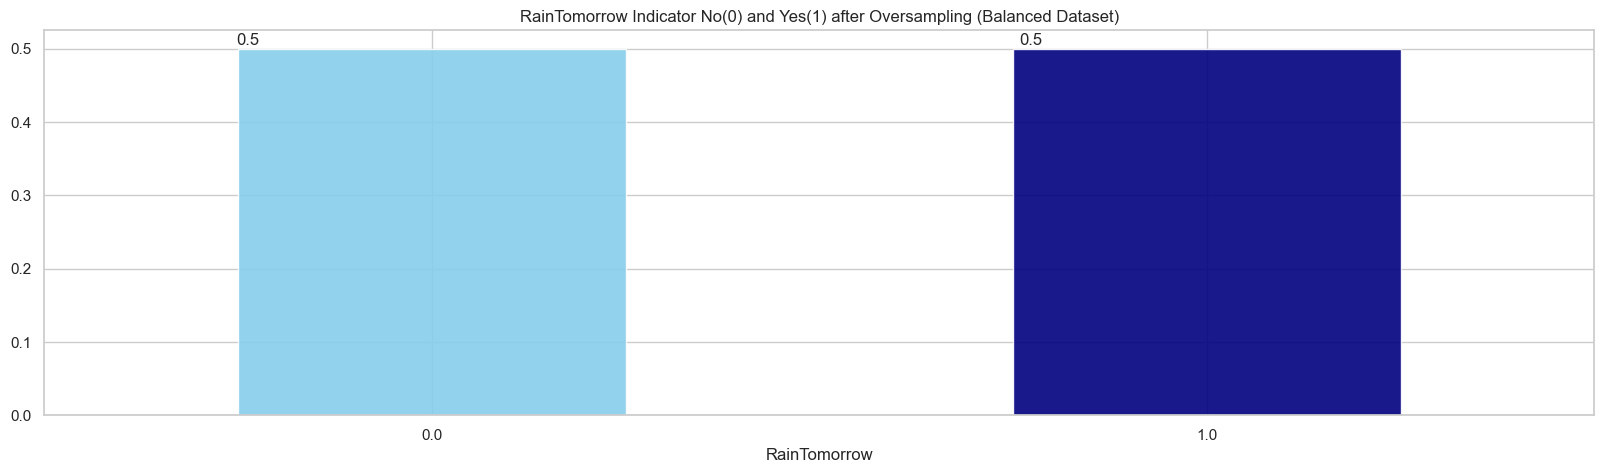

In [361]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

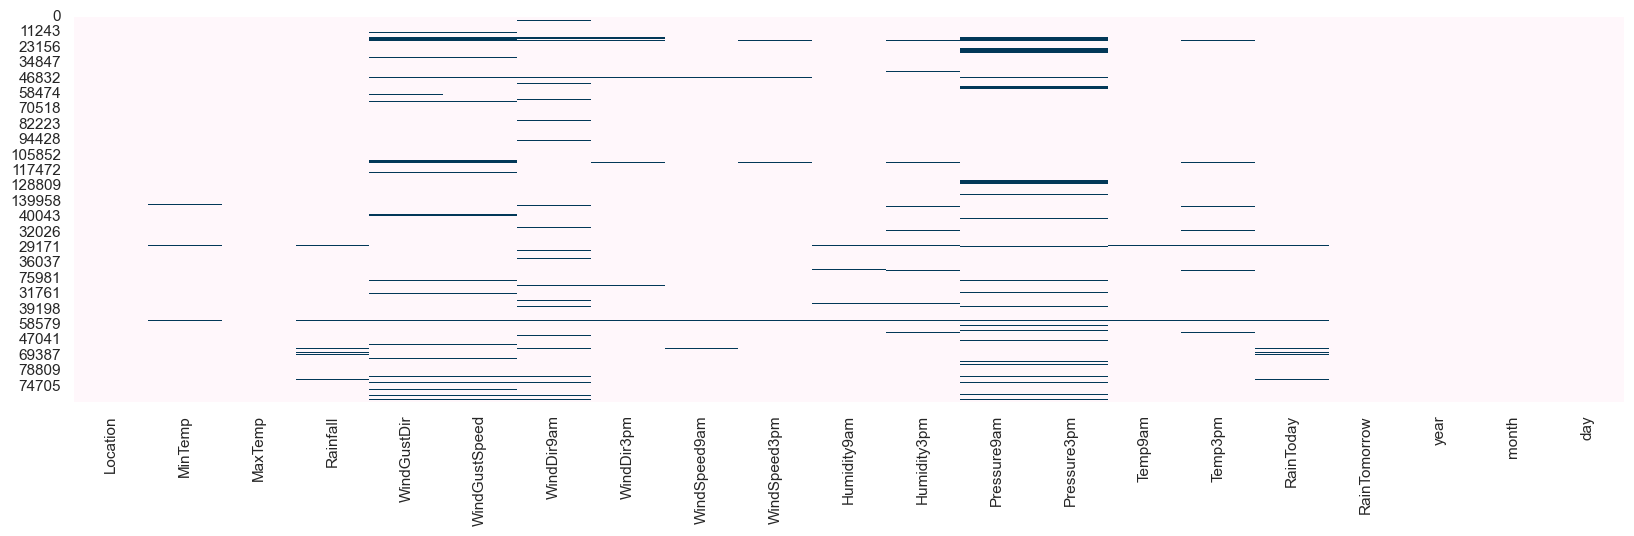

In [362]:
# Missing Data Pattern in Training Data
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [363]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Pressure9am,21620,0.097991
Pressure3pm,21619,0.097987
WindGustDir,15338,0.069518
WindGustSpeed,15232,0.069038
WindDir9am,14520,0.065811


In [364]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [365]:
# Impute categorical var with Mode
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [366]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [367]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [368]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location         25.0
MinTemp           9.2
MaxTemp          10.2
Rainfall          2.4
WindGustDir       9.0
WindGustSpeed    19.0
WindDir9am        8.0
WindDir3pm        8.0
WindSpeed9am     13.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      30.0
Pressure9am       8.8
Pressure3pm       8.9
Temp9am           9.3
Temp3pm           9.8
RainToday         1.0
RainTomorrow      1.0
year              5.0
month             5.0
day              15.0
dtype: float64


In [369]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(173739, 21)

In [370]:
MiceImputed.tail(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
90843,14,15.3,22.1,0.4,10,48.000000,10,10,35.0,30.0,...,82.0,1030.900000,1028.200000,18.9,17.8,0.0,1.0,2010,7,27
120324,32,7.1,20.0,6.0,6,41.000000,5,6,9.0,30.0,...,47.0,1018.700000,1015.400000,11.1,18.8,1.0,1.0,2016,8,16
16816,24,13.6,32.0,0.0,13,27.531507,4,4,2.0,4.0,...,38.0,1016.859956,1011.090684,20.2,31.5,0.0,1.0,2013,12,4
23840,27,12.8,18.6,0.0,9,33.000000,9,2,13.0,19.0,...,50.0,1023.900000,1021.700000,17.0,16.8,0.0,1.0,2016,9,11
108762,1,9.5,21.3,4.4,13,40.650148,3,3,22.0,6.0,...,53.0,1008.900000,1007.100000,15.0,21.2,1.0,1.0,2009,6,10


In [371]:

# MiceImputed = df_onehot.copy()
# MiceImputed

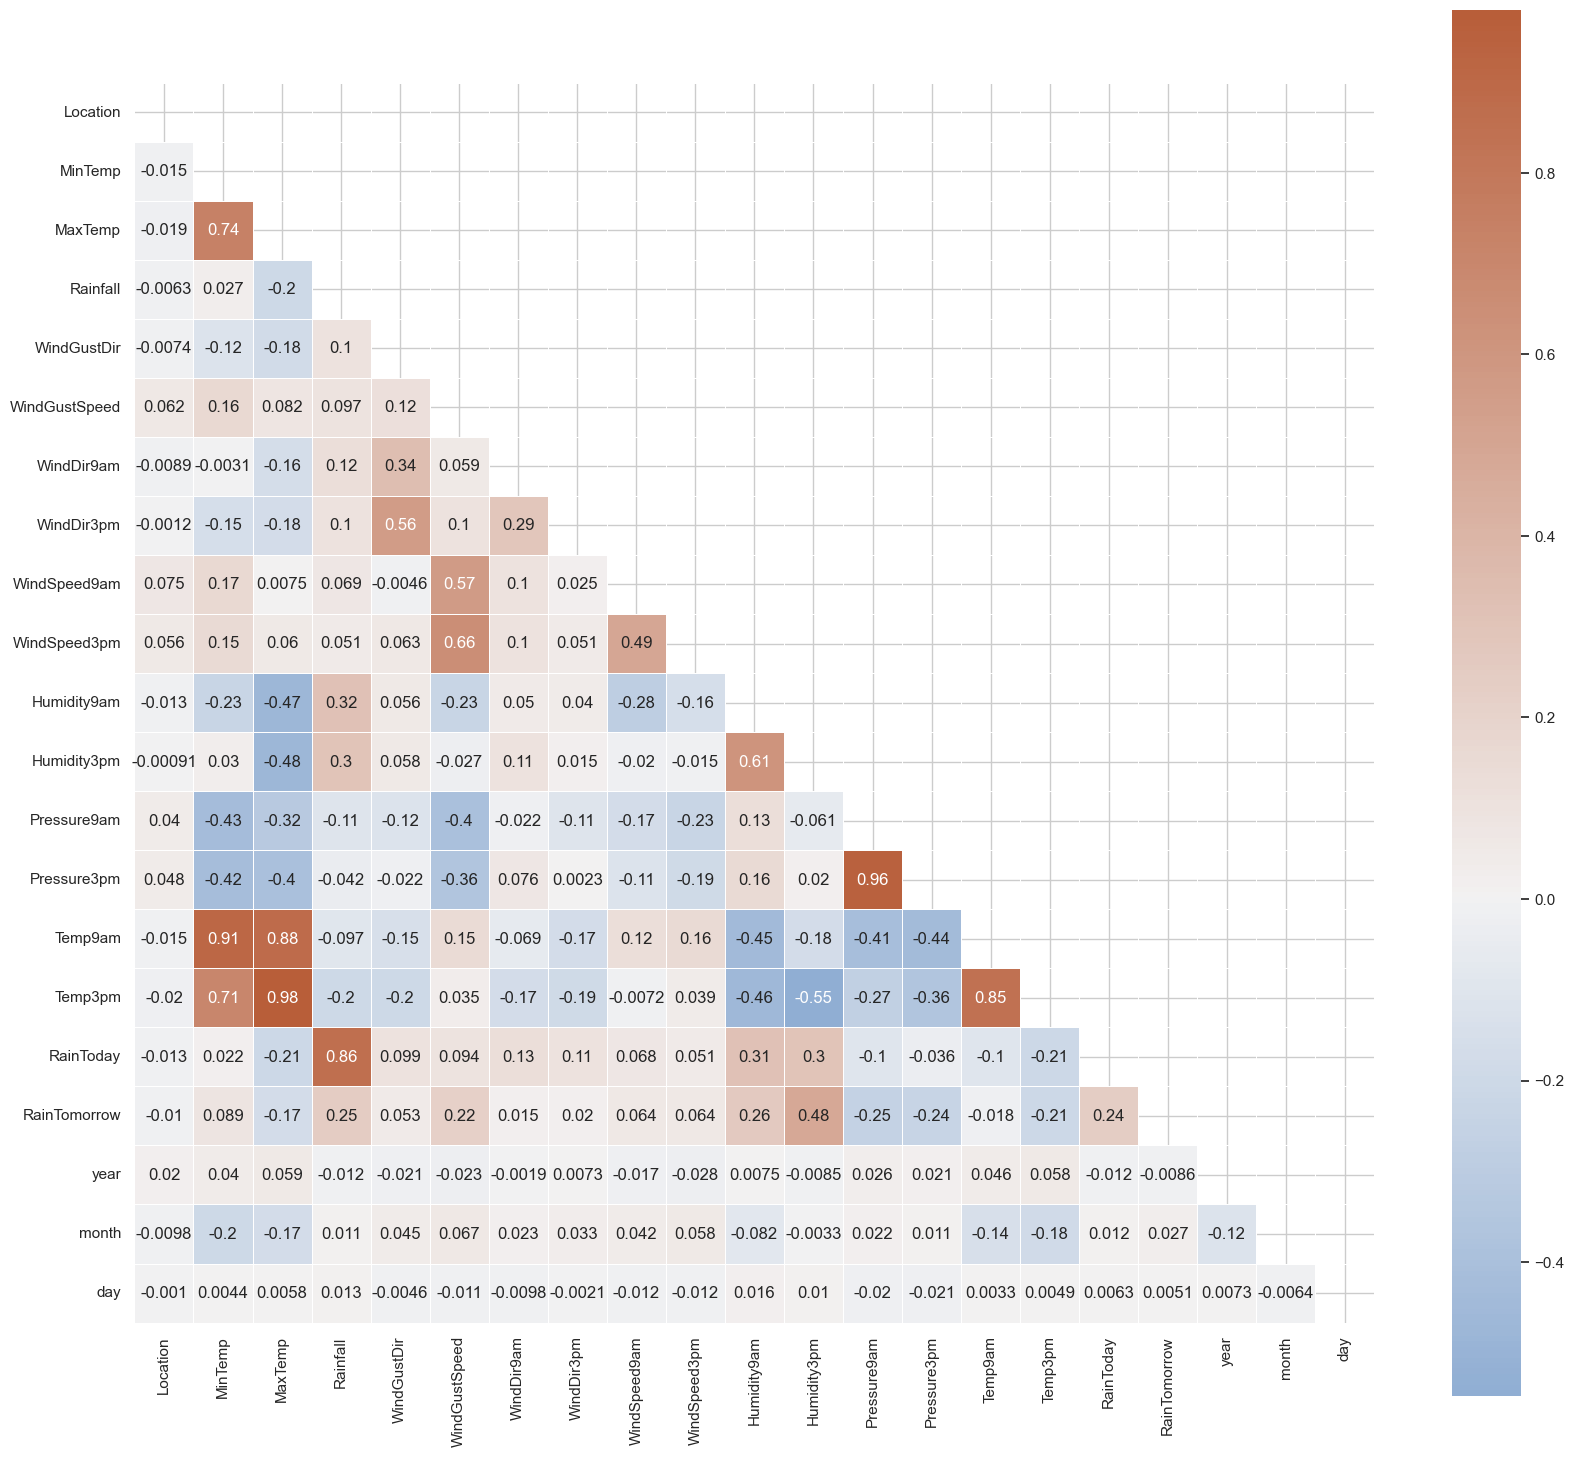

In [372]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

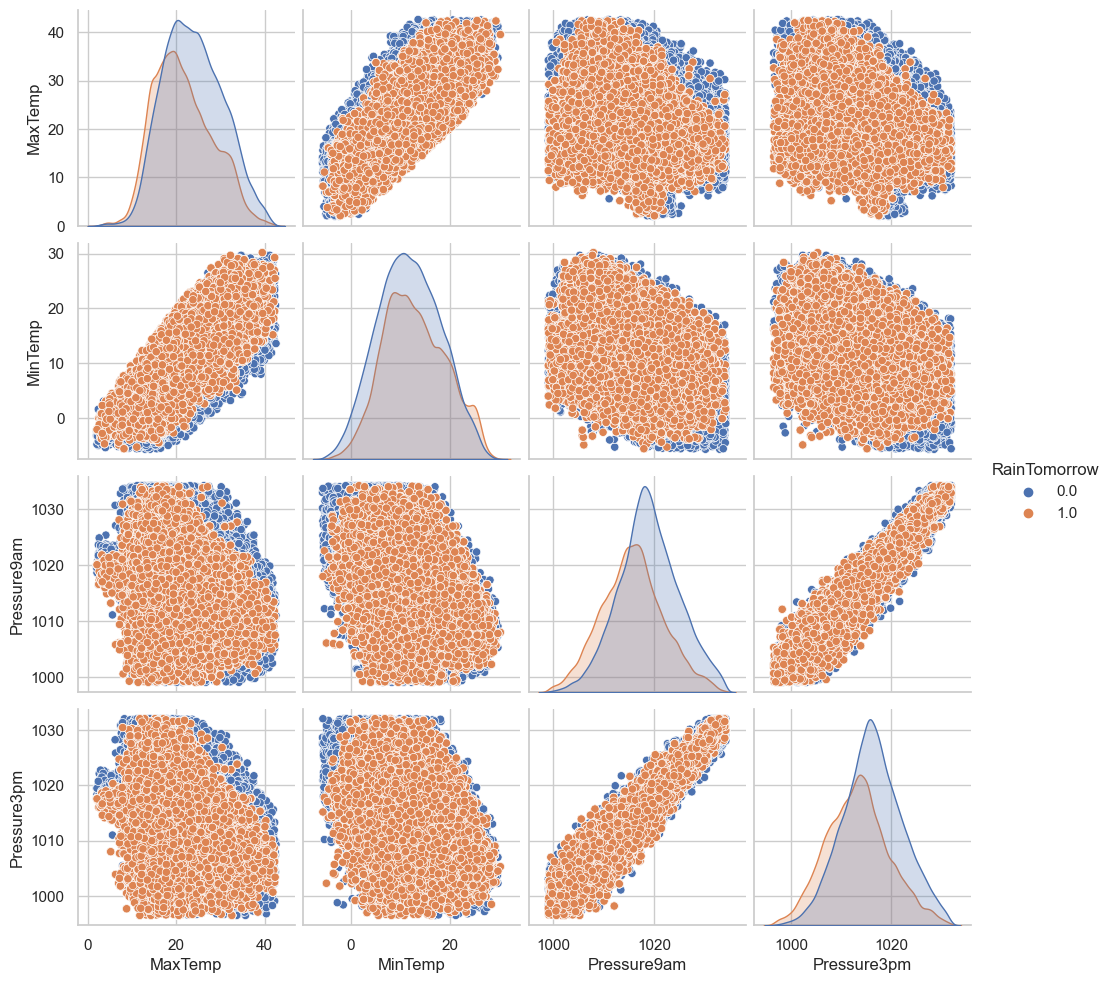

In [373]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
plt.show()

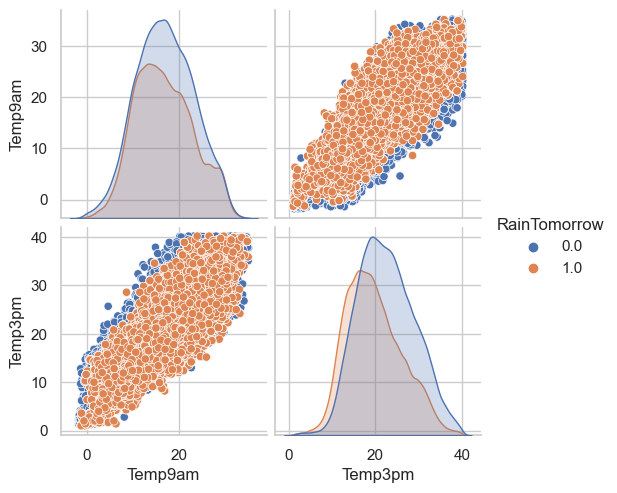

In [376]:
sns.pairplot( data=MiceImputed, vars=('Temp9am', 'Temp3pm'), hue='RainTomorrow' )
plt.show()

In [377]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [378]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [379]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm']
[0.03753272 0.04878424 0.04886709 0.04093449 0.0312993  0.05960036
 0.03105117 0.03198757 0.03061023 0.03450058 0.05614491 0.19295239
 0.06458934 0.08251079 0.04540759 0.05714134 0.01688921 0.0253904
 0.02799933 0.03580693]


In [382]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

#  ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [383]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [384]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             confusion_matrix, ConfusionMatrixDisplay, 
                             roc_curve, classification_report)

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    time_taken = time.time() - t0
    
    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken}")
    
    print(classification_report(y_test, y_pred, digits=5))
    
    # Plot ROC curve
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, _ = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    
    # Compute and plot normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(cm_normalized, display_labels=model.classes_).plot(cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.7722458846552319
ROC Area under Curve = 0.7628640148401337
Cohen's Kappa = 0.5317291622702438
Time taken = 2.037306308746338
              precision    recall  f1-score   support

         0.0    0.77649   0.83669   0.80547     19582
         1.0    0.76568   0.68904   0.72534     15166

    accuracy                        0.77225     34748
   macro avg    0.77109   0.76286   0.76540     34748
weighted avg    0.77177   0.77225   0.77050     34748



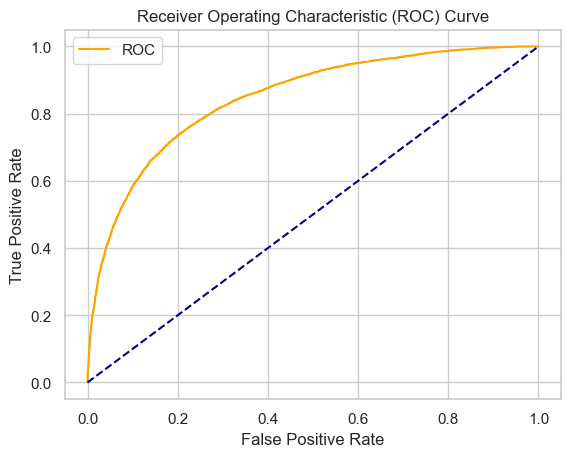

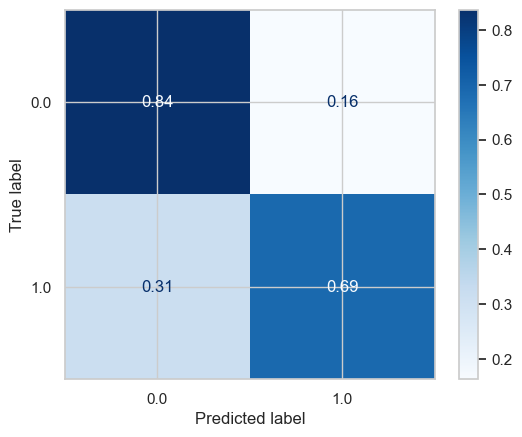

In [385]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8379187291354898
ROC Area under Curve = 0.8376594361654828
Cohen's Kappa = 0.6720908874182501
Time taken = 0.4044835567474365
              precision    recall  f1-score   support

         0.0    0.86835   0.83970   0.85378     19582
         1.0    0.80148   0.83562   0.81819     15166

    accuracy                        0.83792     34748
   macro avg    0.83491   0.83766   0.83599     34748
weighted avg    0.83916   0.83792   0.83825     34748



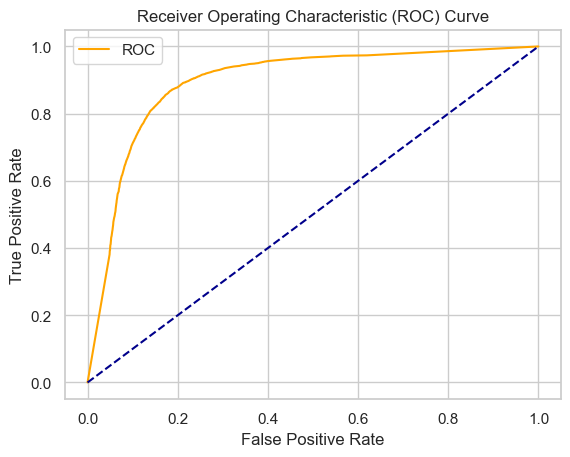

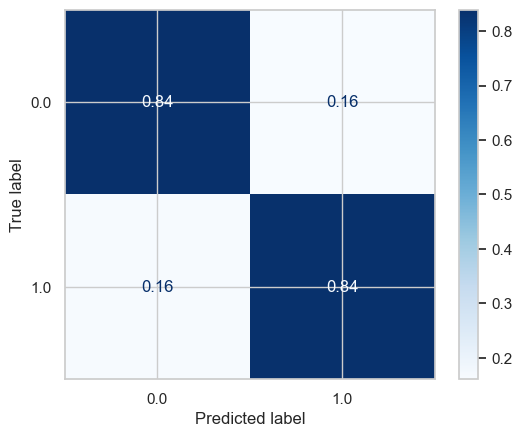

In [386]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



Accuracy = 0.7990675722343732
ROC Area under Curve = 0.7938954681661173
Cohen's Kappa = 0.5900017636256303
Time taken = 251.19154143333435
              precision    recall  f1-score   support

         0.0    0.81365   0.83459   0.82399     19582
         1.0    0.77909   0.75320   0.76592     15166

    accuracy                        0.79907     34748
   macro avg    0.79637   0.79390   0.79496     34748
weighted avg    0.79857   0.79907   0.79865     34748



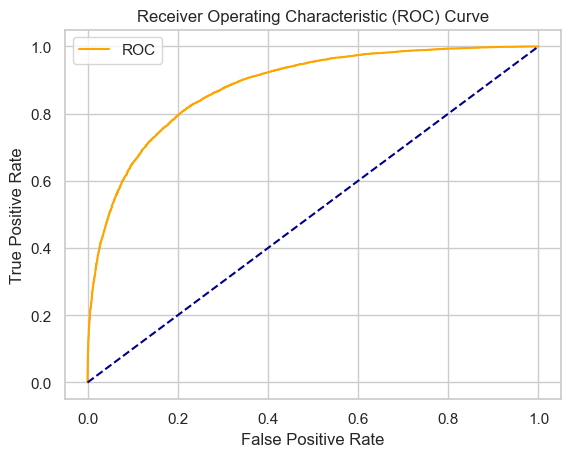

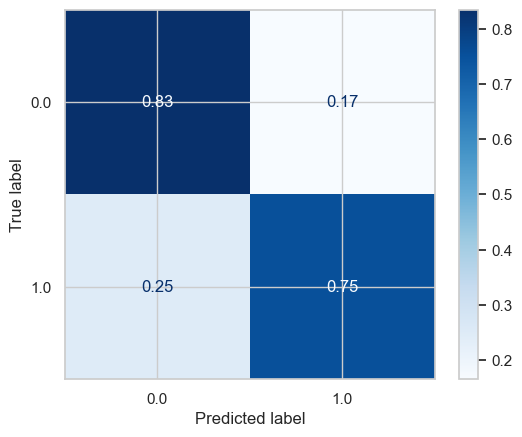

In [387]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.9087717278692299
ROC Area under Curve = 0.9086123844340385
Cohen's Kappa = 0.8150432742799397
Time taken = 27.00286030769348
              precision    recall  f1-score   support

         0.0    0.92691   0.90987   0.91831     19582
         1.0    0.88632   0.90736   0.89672     15166

    accuracy                        0.90877     34748
   macro avg    0.90661   0.90861   0.90751     34748
weighted avg    0.90919   0.90877   0.90888     34748



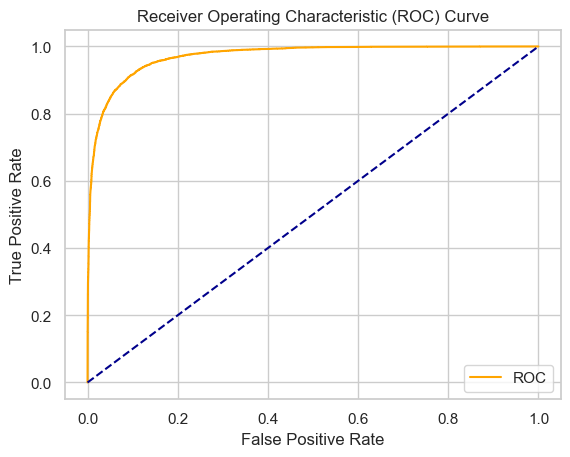

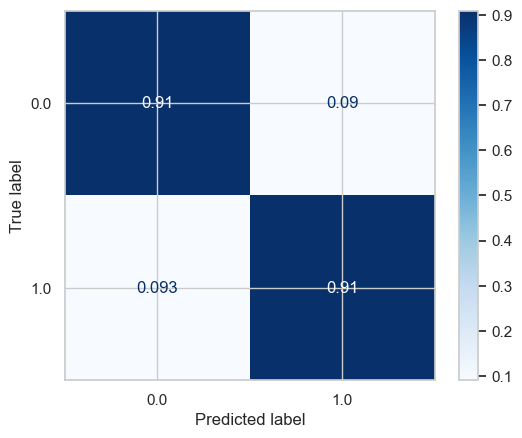

In [388]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8355588810866812
ROC Area under Curve = 0.8317962184009507
Cohen's Kappa = 0.6650064806670393
Time taken = 0.7436509132385254
              precision    recall  f1-score   support

         0.0    0.84900   0.86140   0.85516     19582
         1.0    0.81761   0.80219   0.80982     15166

    accuracy                        0.83556     34748
   macro avg    0.83331   0.83180   0.83249     34748
weighted avg    0.83530   0.83556   0.83537     34748



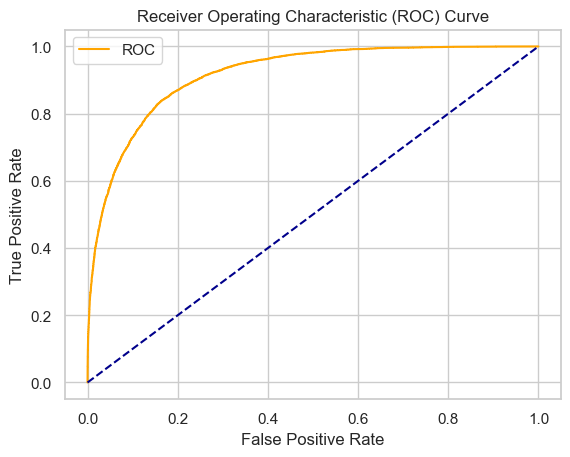

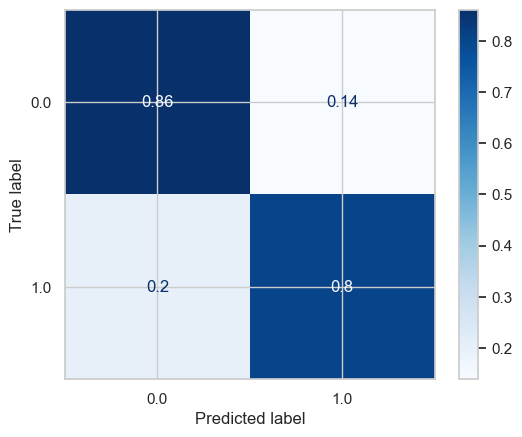

In [389]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)


Accuracy = 0.8935478300909405
ROC Area under Curve = 0.8941831630409599
Cohen's Kappa = 0.7846270093353147
Time taken = 128.56645035743713
              precision    recall  f1-score   support

         0.0    0.91928   0.88918   0.90398     19582
         1.0    0.86272   0.89918   0.88057     15166

    accuracy                        0.89355     34748
   macro avg    0.89100   0.89418   0.89228     34748
weighted avg    0.89459   0.89355   0.89376     34748



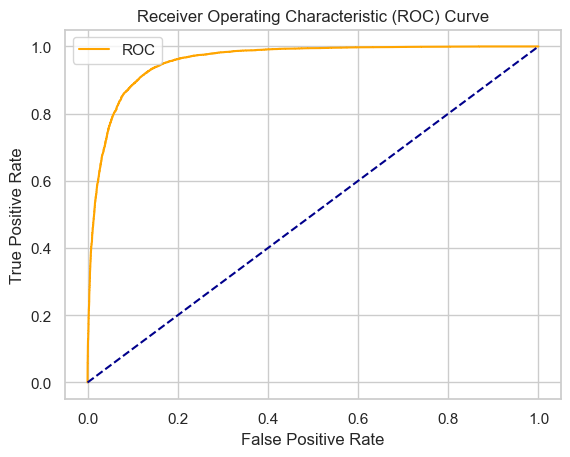

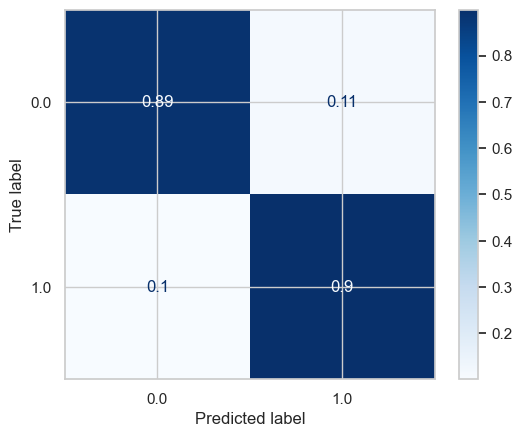

In [390]:
# Catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


Accuracy = 0.9544434212040981
ROC Area under Curve = 0.9569854714960314
Cohen's Kappa = 0.9079964864031238
Time taken = 31.455854654312134
              precision    recall  f1-score   support

         0.0    0.98133   0.93698   0.95865     19582
         1.0    0.92312   0.97699   0.94929     15166

    accuracy                        0.95444     34748
   macro avg    0.95223   0.95699   0.95397     34748
weighted avg    0.95593   0.95444   0.95456     34748



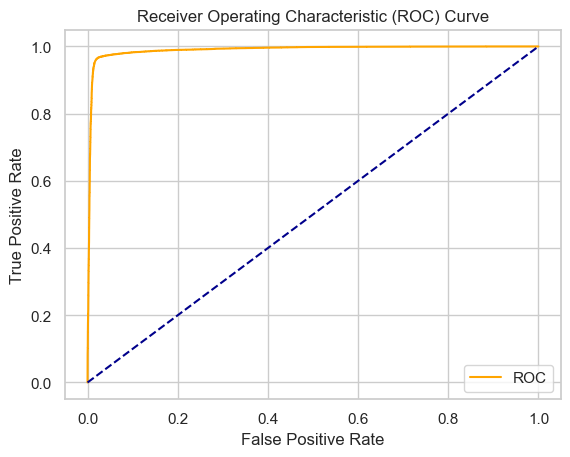

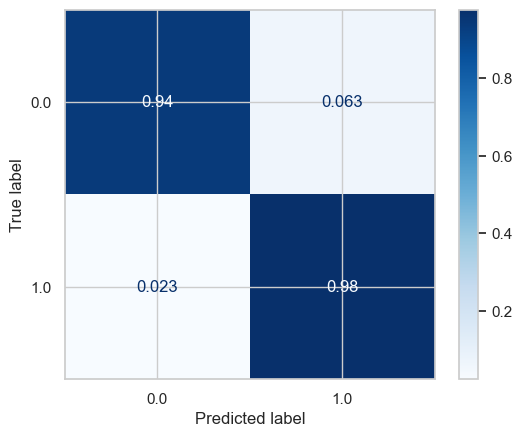

In [391]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


In [392]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42) 
clf3 = MLPClassifier(random_state=42, verbose = 0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

KeyError: "['Sunshine', 'Cloud3pm'] not in index"

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import xgboost as xgb
import catboost as cb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize your previously trained models with their parameters
params_xgb = {'n_estimators': 500, 'max_depth': 16}
model_xgb = xgb.XGBClassifier(**params_xgb)

params_cb = {'iterations': 50, 'max_depth': 16}
model_cb = cb.CatBoostClassifier(**params_cb)

params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 500}
model_nn = MLPClassifier(**params_nn)

params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)

# Fit each model on the training data
model_xgb.fit(X_train, y_train)
model_cb.fit(X_train, y_train)
model_nn.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Create an ensemble of the models using soft voting
ensemble_model = VotingClassifier(estimators=[
        ('xgb', model_xgb),
        ('cb', model_cb),
        ('nn', model_nn),
        ('rf', model_rf)],
        voting='soft')

# Fit ensemble model on training data
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble model on test data
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_ensemble)
ensemble_coh_kap = cohen_kappa_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Ensemble Model ROC AUC: {ensemble_roc_auc}")
print(f"Ensemble Model Cohen's Kappa: {ensemble_coh_kap}")

# You can now compare these metrics with those of the individual models to evaluate the performance
